In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''
with plt.style.context(('dark_background')):
>>>     plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o'
'''
#print(plt.style.available)
plt.style.use('seaborn-whitegrid')

In [424]:
df= pd.read_csv('Sentiment.csv', parse_dates= ['tweet_created'])

In [425]:
df.head(3)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 16:54:46,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 16:54:46,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 16:54:46,629697199312482304,NaN,NaN


In [426]:
df.drop(['id'], axis= 1, inplace=True)
df = df[df.candidate != 'No candidate mentioned']

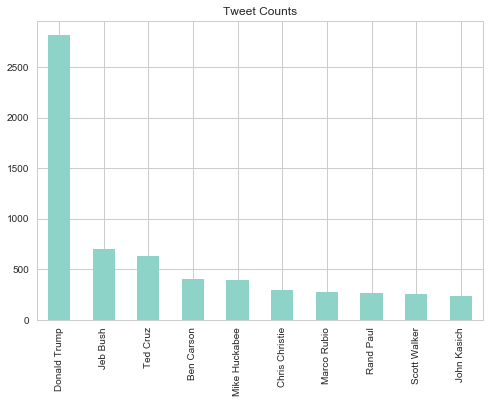

In [427]:
df['candidate'].value_counts().plot(kind= 'bar')
plt.title('Tweet Counts')
plt.show()

In [428]:
d= df[df['candidate']== 'Donald Trump']

In [429]:
p_d= d[d['sentiment']== 'Positive'].tweet_created.value_counts().sort_index(ascending= True).cumsum()
n_d= d[d['sentiment']== 'Negative'].tweet_created.value_counts().sort_index(ascending= True).cumsum()

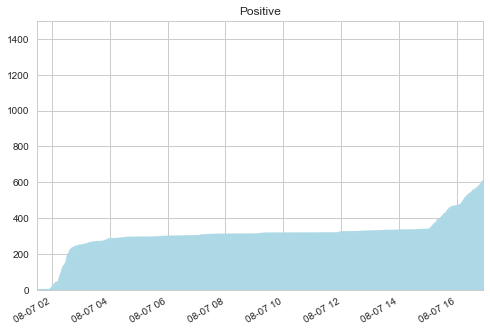

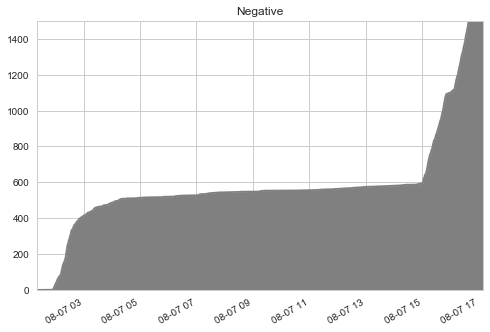

In [430]:
plt.title('Positive')
p_d.plot(kind= 'area', color= 'lightblue')
plt.ylim([0, 1500])
plt.show()
plt.title('Negative')
n_d.plot(kind= 'area', color= 'grey')
plt.ylim([0, 1500])
plt.show()

In [431]:
print(df['candidate'].unique())

['Scott Walker' 'Donald Trump' 'Ted Cruz' 'Ben Carson' 'Mike Huckabee'
 'Jeb Bush' 'Chris Christie' 'Marco Rubio' nan 'Rand Paul' 'John Kasich']


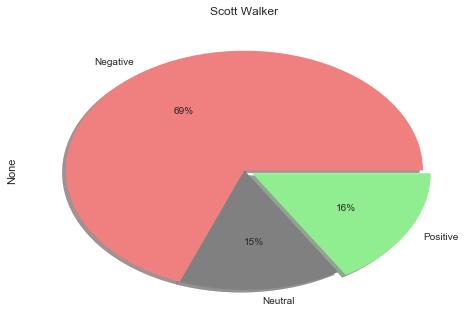

                    ------ ------  ------          


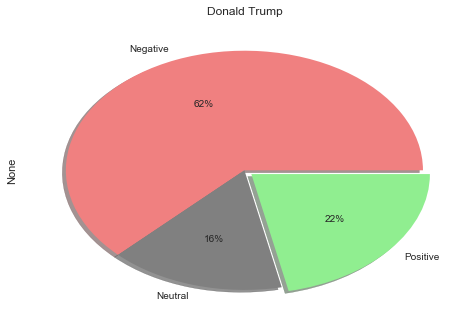

                    ------ ------  ------          


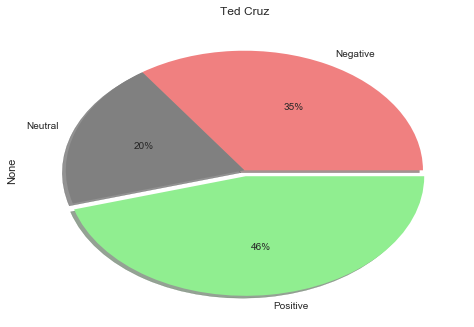

                    ------ ------  ------          


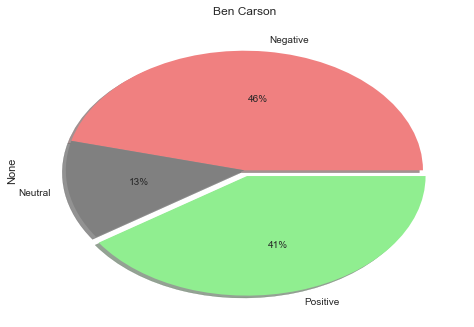

                    ------ ------  ------          


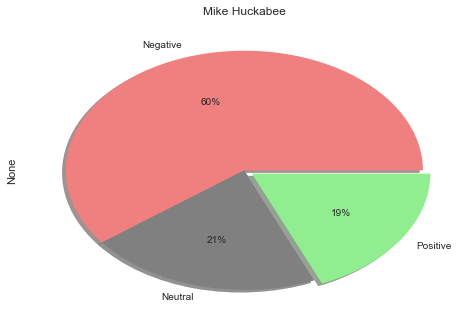

                    ------ ------  ------          


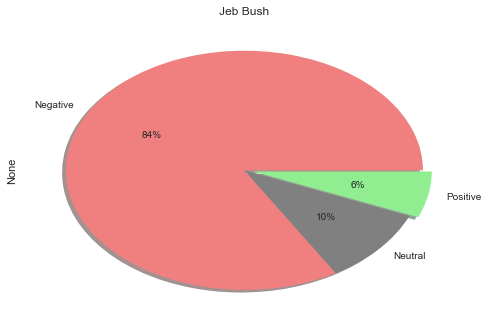

                    ------ ------  ------          


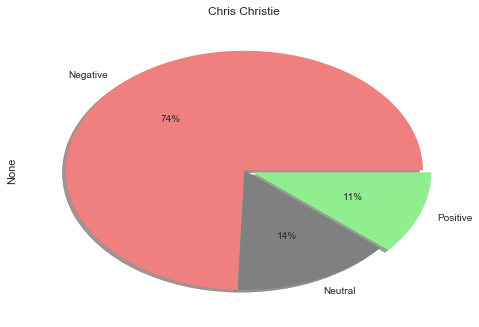

                    ------ ------  ------          


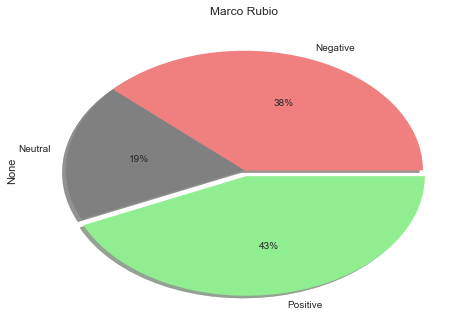

                    ------ ------  ------          


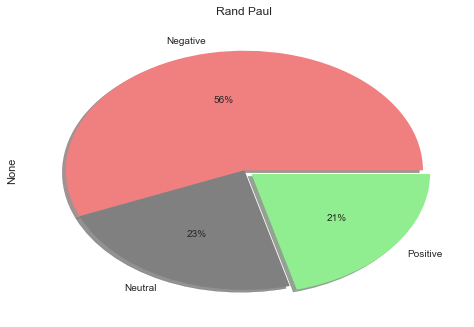

                    ------ ------  ------          


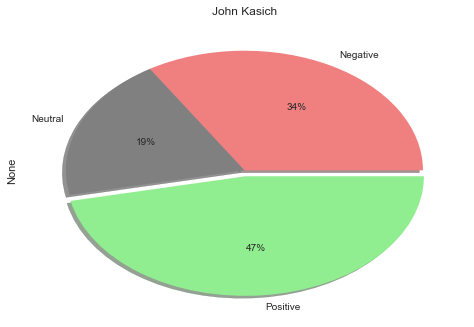

                    ------ ------  ------          


In [432]:
for i in df['candidate'].unique()[:8]:
    df_= df[df['candidate']== i]
    plt.title(i)
    df_.groupby('sentiment').size().plot(kind= 'pie', colors=['lightcoral', 'grey', 'lightgreen'], explode=[0,0,0.05], autopct= '%1.f%%', shadow=True)
    plt.show()
    print('                    ------ ------  ------          ')
for i in df['candidate'].unique()[9:]:
    df_= df[df['candidate']== i]
    plt.title(i)
    df_.groupby('sentiment').size().plot(kind= 'pie', colors=['lightcoral', 'grey', 'lightgreen'], explode=[0,0,0.05], autopct= '%1.f%%', shadow=True)
    plt.show()
    print('                    ------ ------  ------          ')

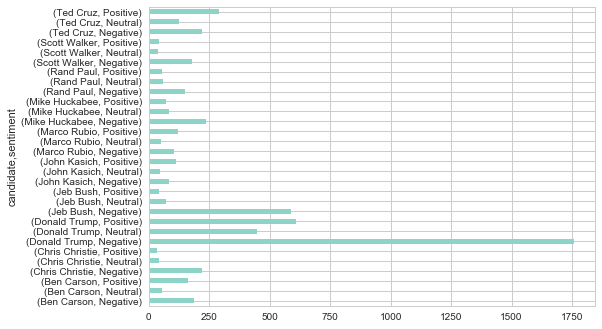

In [433]:
df.groupby(['candidate','sentiment']).size().plot(kind='barh')
plt.show()

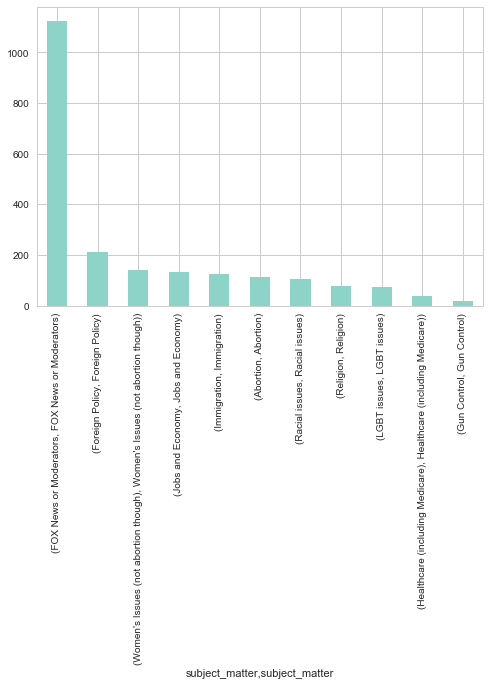

subject_matter                        subject_matter                      
FOX News or Moderators                FOX News or Moderators                  1125
Foreign Policy                        Foreign Policy                           211
Women's Issues (not abortion though)  Women's Issues (not abortion though)     142
Jobs and Economy                      Jobs and Economy                         131
Immigration                           Immigration                              124
Name: subject_matter, dtype: int64


In [434]:
df_subj= df.groupby('subject_matter')
df_subj= df_subj.subject_matter.value_counts().sort_values(ascending= False)[1:]
df_subj.plot(kind= 'bar')
plt.show()
print(df_subj.head())

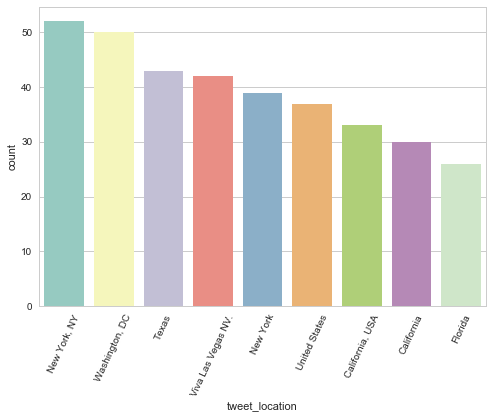

In [435]:
df["time"] = df["tweet_created"].apply(lambda x:pd.to_datetime(x).hour)

plt.xticks(rotation= 65)
sns.countplot('tweet_location', data = df , order=df["tweet_location"].value_counts()[1:10].index)
plt.show()

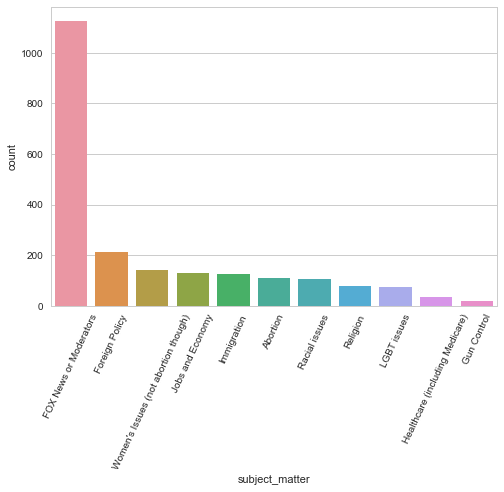

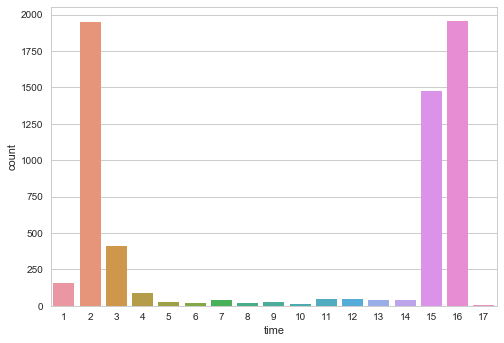

In [436]:
plt.xticks(rotation= 65)
sns.countplot("subject_matter" , data = df , order=df["subject_matter"].value_counts()[1:].index)
plt.show()

sns.countplot("time", data = df )
plt.show()

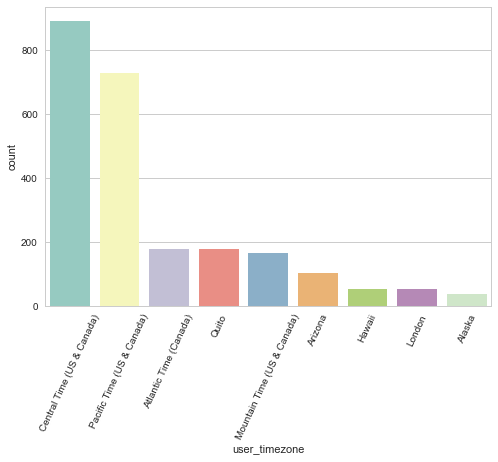

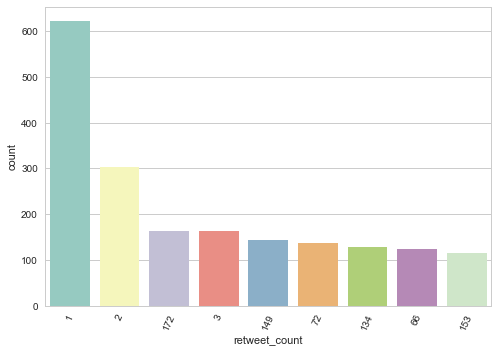

In [437]:
plt.xticks(rotation= 65)
sns.countplot("user_timezone", data = df , order=df["user_timezone"].value_counts()[1:10].index)
plt.show()

plt.xticks(rotation= 65)
sns.countplot('retweet_count', data= df, order=df["retweet_count"].value_counts().sort_values(ascending= False)[1:10].index)
plt.show()

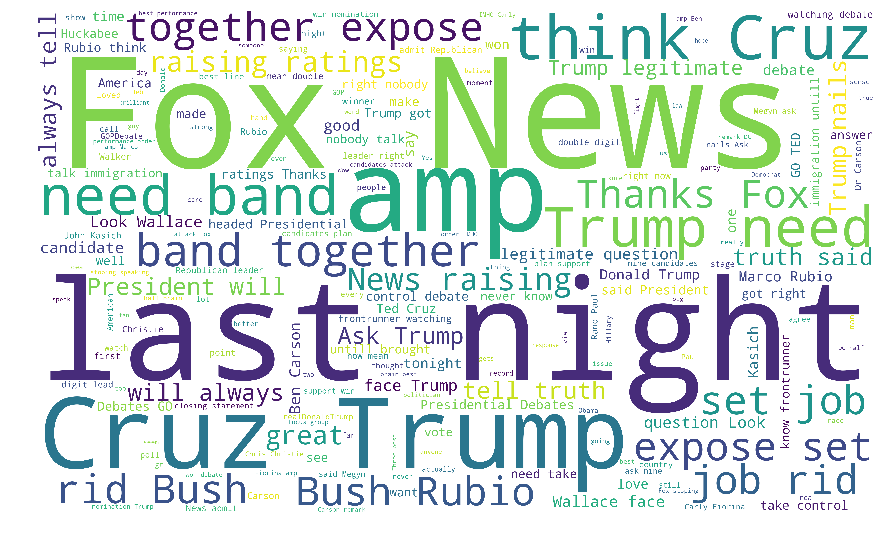

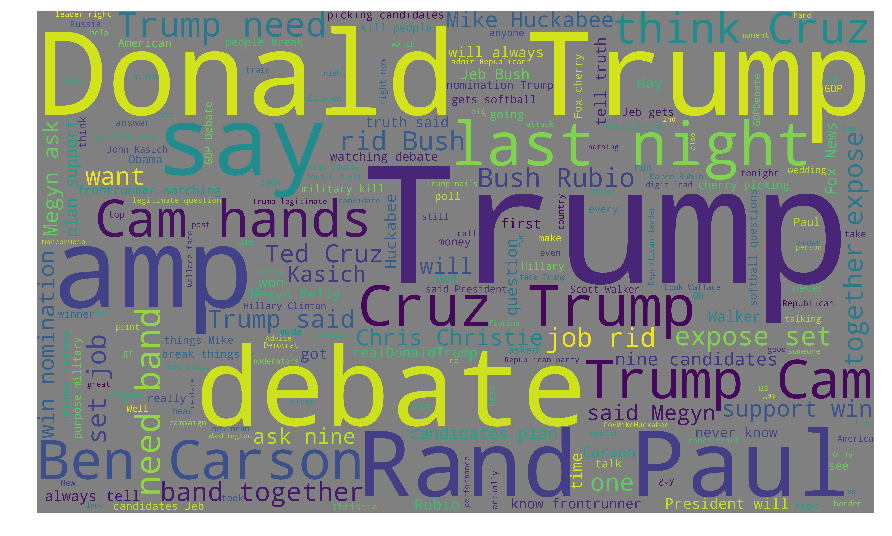

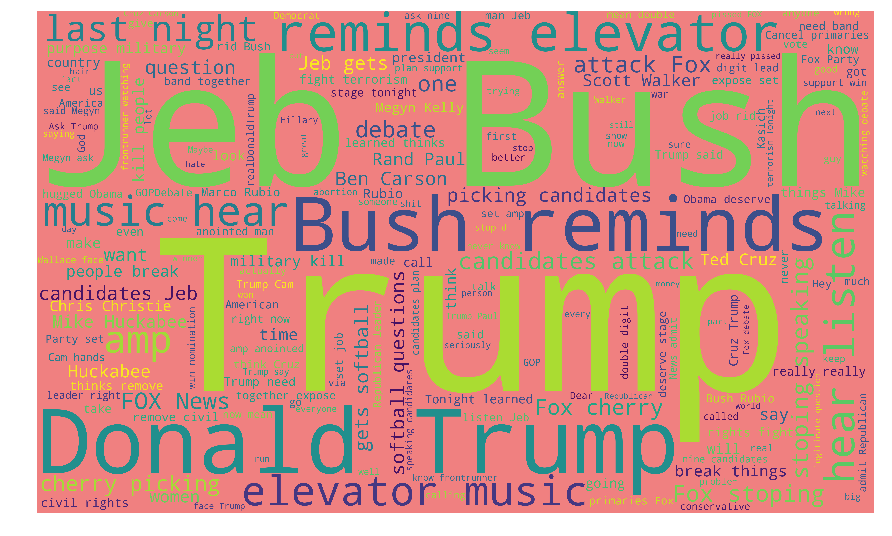

In [438]:
from wordcloud import WordCloud, STOPWORDS

data= df.loc[:, ['text', 'sentiment']]
p= data[data['sentiment']== 'Positive']['text']
neu= data[data['sentiment']== 'Neutral']['text']
n= data[data['sentiment']== 'Negative']['text']

words = ' '.join(p)
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=5000, height=3000).generate(cleaned_word)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
    
words = ' '.join(neu)
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='grey', width=5000, height=3000).generate(cleaned_word)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

words = ' '.join(n)
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='lightcoral', width=5000, height=3000).generate(cleaned_word)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [439]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

df["tweet_length"]= df["text"].apply(tweet_lengths)
print(df.candidate.unique())
tl={}
for candidate in df.candidate[:8]:
    tl[candidate] = df["tweet_length"][df["candidate"] == candidate].value_counts()
for candidate in df.candidate[9:]:
    tl[candidate] = df["tweet_length"][df["candidate"] == candidate].value_counts()


['Scott Walker' 'Donald Trump' 'Ted Cruz' 'Ben Carson' 'Mike Huckabee'
 'Jeb Bush' 'Chris Christie' 'Marco Rubio' nan 'Rand Paul' 'John Kasich']


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


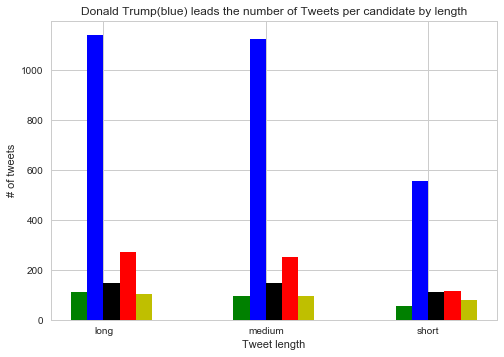

In [440]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 15, 5))
ax.bar(x, tl["Scott Walker"], width, color='g')
ax.bar(x + width, tl["Donald Trump"], width, color='b')
ax.bar(x + (width * 2), tl["Ben Carson"], width, color='k')
ax.bar(x + (width * 3), tl["Ted Cruz"], width, color='r')
ax.bar(x + (width * 4), tl["Marco Rubio"], width, color='y')
plt.legend()

ax.set_ylabel('# of tweets')
ax.set_title('Donald Trump(blue) leads the number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

In [441]:
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import nltk
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in df.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.sentiment))

_pos=df[df['sentiment'] == 'Positive']
_pos= _pos['text']
_neg = df[df['sentiment'] == 'Negative']
_neg = _neg['text']
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

In [442]:
from nltk import FreqDist
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist =FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

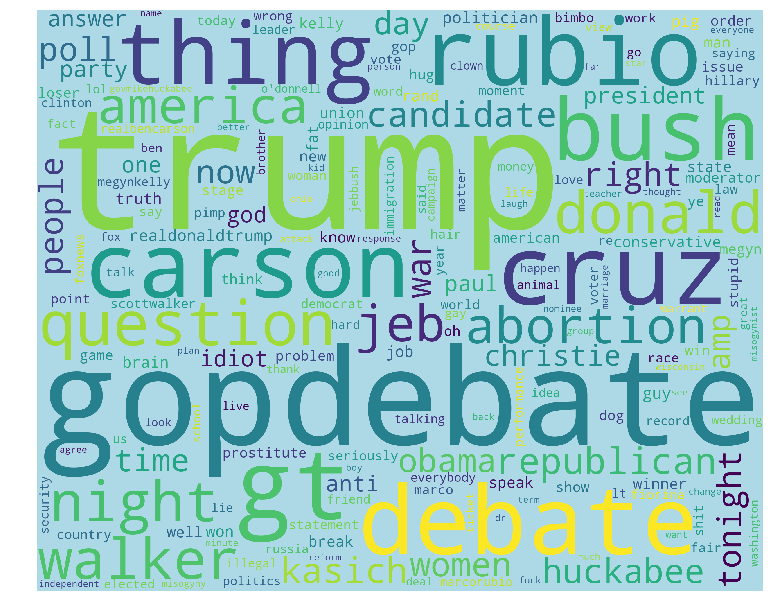

In [443]:
words = ' '.join(w_features)
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='lightblue',
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [444]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
d= df[['text', 'sentiment']]

Using TensorFlow backend.


In [464]:
d= d[d.sentiment != "Neutral"]
d['text']= d['text'].apply(lambda x: x.lower())
d['text'] = d['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
for idx,row in d.iterrows():
    row[0] = row[0].replace('rt',' ')
max_features= 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(d['text'].values)
X = tokenizer.texts_to_sequences(d['text'].values)
X = pad_sequences(X)

In [471]:
embed_dim= 64
lstm_out= 128
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.25))
model.add(LSTM(lstm_out, dropout_U=0.25, dropout_W=0.25))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.25, recurrent_dropout=0.25)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 29, 64)            192000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 291,074
Trainable params: 291,074
Non-trainable params: 0
_________________________________________________________________
None


In [472]:
Y = pd.get_dummies(d['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 14)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3727, 29) (3727, 2)
(1598, 29) (1598, 2)


In [473]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 30, batch_size=batch_size, verbose= 2)

Epoch 1/30
 - 6s - loss: 0.5526 - acc: 0.7266
Epoch 2/30
 - 4s - loss: 0.3906 - acc: 0.8304
Epoch 3/30
 - 4s - loss: 0.3187 - acc: 0.8658
Epoch 4/30
 - 4s - loss: 0.2684 - acc: 0.8878
Epoch 5/30
 - 4s - loss: 0.2284 - acc: 0.9056
Epoch 6/30
 - 5s - loss: 0.1987 - acc: 0.9163
Epoch 7/30
 - 4s - loss: 0.1861 - acc: 0.9262
Epoch 8/30
 - 4s - loss: 0.1668 - acc: 0.9284
Epoch 9/30
 - 4s - loss: 0.1512 - acc: 0.9378
Epoch 10/30
 - 4s - loss: 0.1455 - acc: 0.9404
Epoch 11/30
 - 4s - loss: 0.1339 - acc: 0.9431
Epoch 12/30
 - 4s - loss: 0.1305 - acc: 0.9442
Epoch 13/30
 - 4s - loss: 0.1199 - acc: 0.9488
Epoch 14/30
 - 4s - loss: 0.1249 - acc: 0.9455
Epoch 15/30
 - 4s - loss: 0.1182 - acc: 0.9512
Epoch 16/30
 - 4s - loss: 0.1187 - acc: 0.9463
Epoch 17/30
 - 4s - loss: 0.1172 - acc: 0.9485
Epoch 18/30
 - 4s - loss: 0.1087 - acc: 0.9541
Epoch 19/30
 - 4s - loss: 0.1074 - acc: 0.9517
Epoch 20/30
 - 4s - loss: 0.1103 - acc: 0.9517
Epoch 21/30
 - 4s - loss: 0.1054 - acc: 0.9549
Epoch 22/30
 - 4s - lo

In [474]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size= batch_size)
print("Loss: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

Loss: 1.29
Accuracy: 0.78
